In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_dodge_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_sheep_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set d

## Import Modules

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
len(paths)

2800

In [5]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [6]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [7]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [8]:
df['label'].value_counts()

label
fear       400
angry      400
disgust    400
neutral    400
sad        400
ps         400
happy      400
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

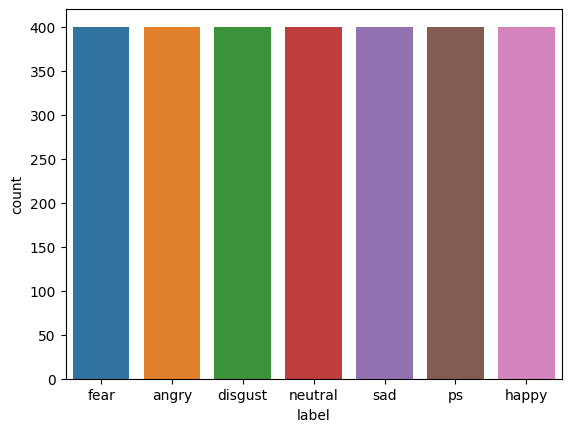

In [9]:
sns.countplot(x=df['label'])

In [10]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

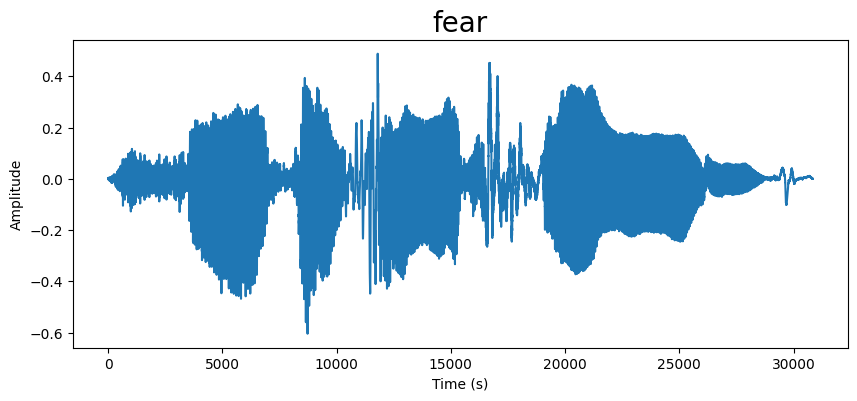

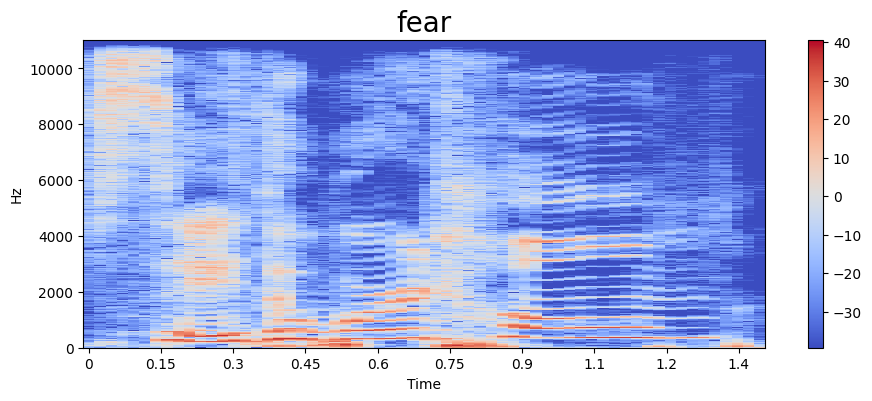

In [11]:
'''
emotion = 'fear'
path = df['speech'][df['label']==emotion][0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

'''
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

emotion = 'fear'
path = df['speech'][df['label']==emotion].values[0]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)





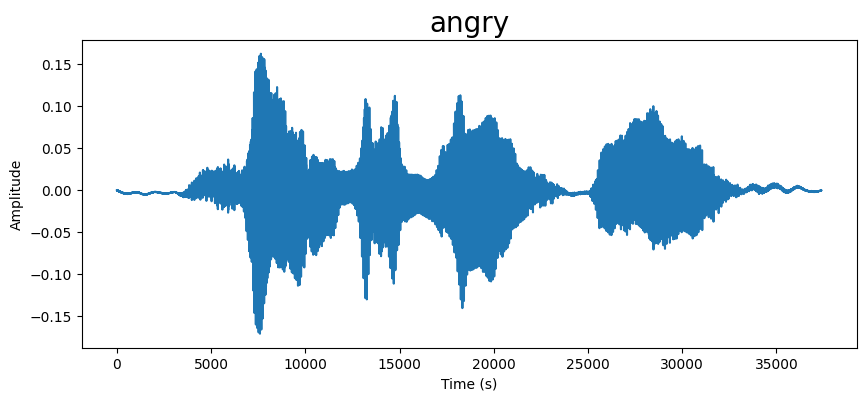

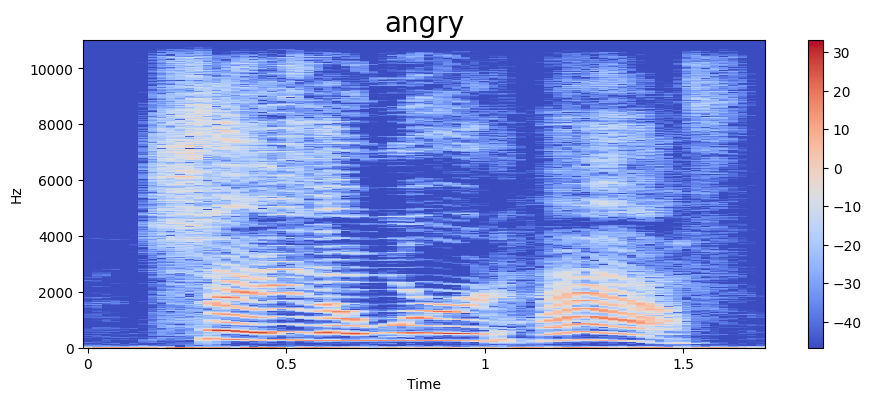

In [12]:
'''
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
'''
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

# Assuming df is your DataFrame and it contains 'speech' and 'label' columns
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


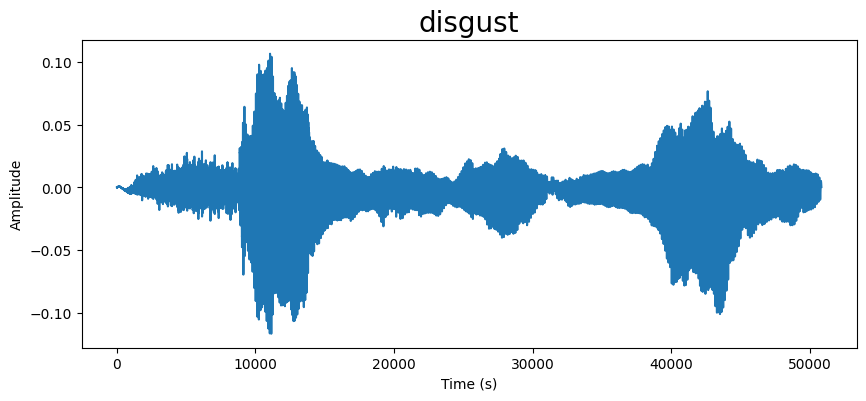

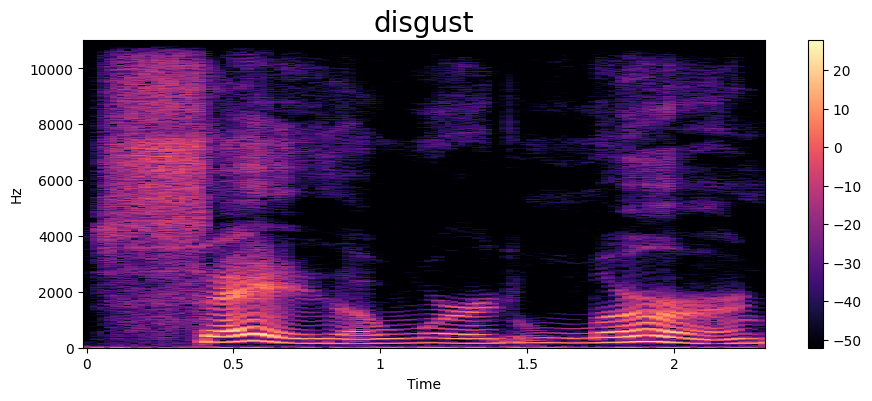

In [13]:
'''
emotion = 'disgust'
path = df['speech'][df['label']==emotion][0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
'''
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

# Assuming df is your DataFrame and it contains 'speech' and 'label' columns
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

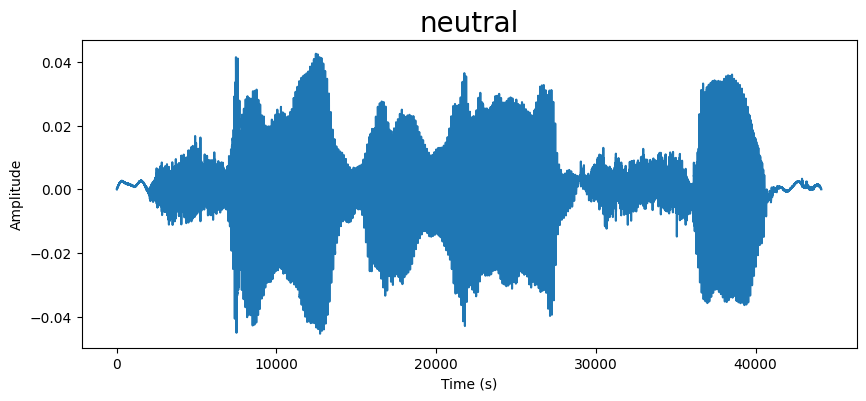

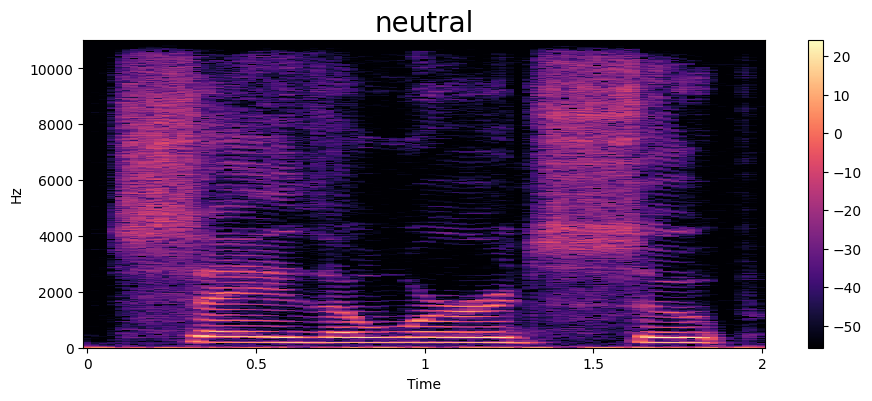

In [14]:
'''
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
'''

import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


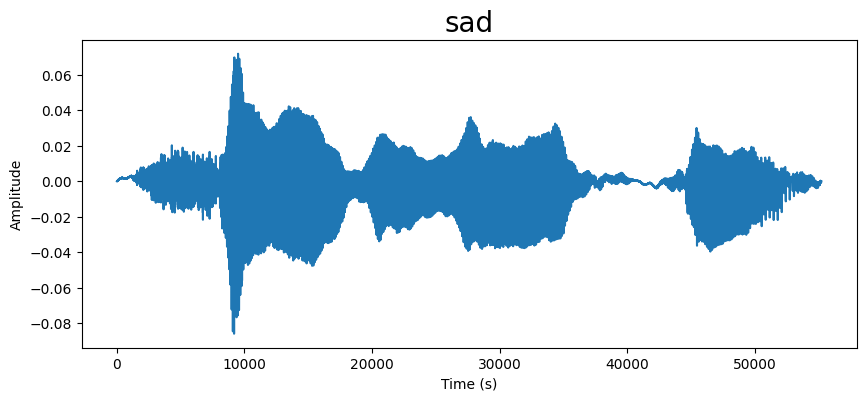

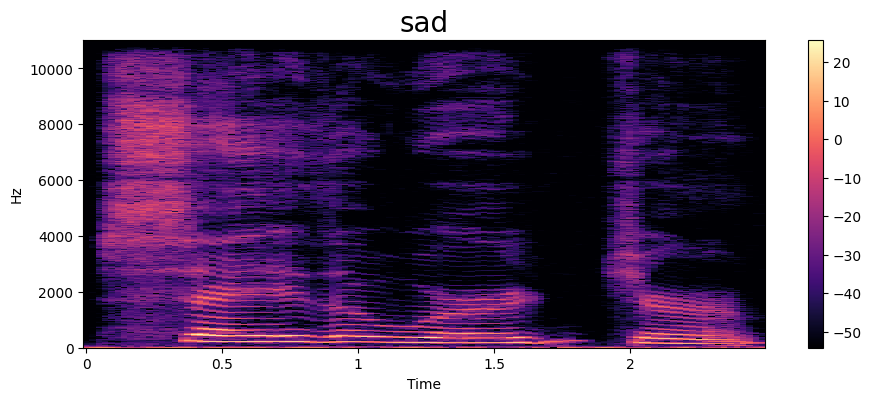

In [15]:
'''
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
'''

import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

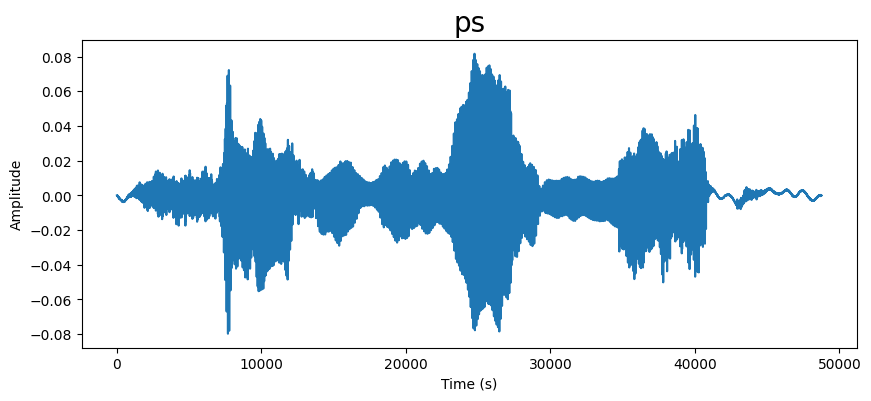

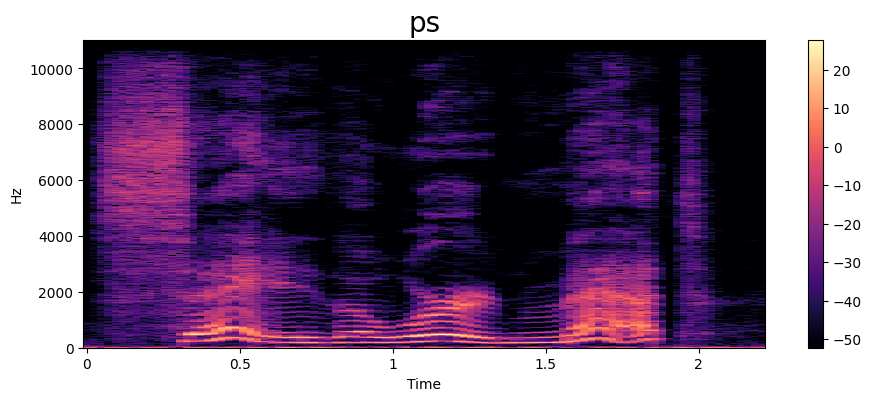

In [16]:
'''
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
'''
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


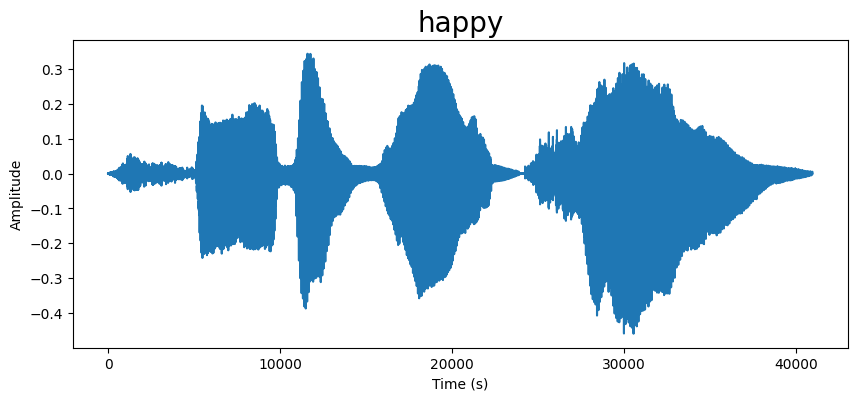

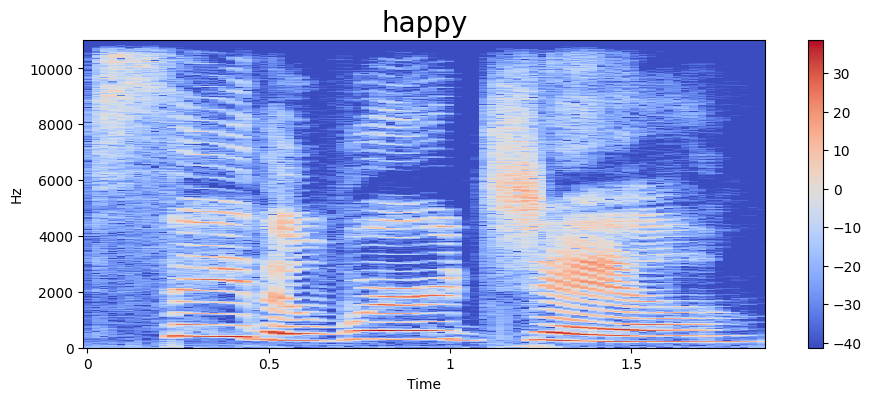

In [17]:
'''
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)
'''

import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [18]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [19]:
extract_mfcc(df['speech'][0])

array([-285.7373    ,   85.78295   ,   -2.1689105 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.412452  ,   -3.0002632 ,
          1.0844971 ,   11.078272  ,  -17.419662  ,   -8.093215  ,
          6.5879736 ,   -4.220953  ,   -9.15508   ,    3.521479  ,
        -13.186381  ,   14.078853  ,   19.669733  ,   22.725618  ,
         32.574642  ,   16.325031  ,   -3.8427277 ,    0.89629626,
        -11.239262  ,    6.653462  ,   -2.5883691 ,   -7.7140174 ,
        -10.941658  ,   -2.4007556 ,   -5.2812862 ,    4.2711563 ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.8697433 ,
         -1.6027985 ,    2.5600505 ,   11.454375  ,   11.23345   ],
      dtype=float32)

In [20]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [21]:
X_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
2795    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
2796    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
2797    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
2798    [-353.14743, 101.68391, -14.175895, -12.037377...
2799    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: speech, Length: 2800, dtype: object

In [22]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [23]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [25]:
y = y.toarray()

In [26]:
y.shape

(2800, 7)

## Create the LSTM Model

In [84]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(223, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 223)               200700    
                                                                 
 dropout_10 (Dropout)        (None, 223)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                14336     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 7)                

In [85]:
# Train the model
history = model.fit(X, y, validation_split=0.25, epochs=101, batch_size=64, shuffle=True)

Epoch 1/101
33/33 [==============================] - 4s 26ms/step - loss: 1.3069 - accuracy: 0.5119 - val_loss: 2.9000 - val_accuracy: 0.0457
Epoch 2/101
33/33 [==============================] - 0s 9ms/step - loss: 0.4388 - accuracy: 0.8624 - val_loss: 2.4963 - val_accuracy: 0.3929
Epoch 3/101
33/33 [==============================] - 0s 8ms/step - loss: 0.2578 - accuracy: 0.9190 - val_loss: 3.0400 - val_accuracy: 0.3343
Epoch 4/101
33/33 [==============================] - 0s 8ms/step - loss: 0.2581 - accuracy: 0.9238 - val_loss: 3.1822 - val_accuracy: 0.3600
Epoch 5/101
33/33 [==============================] - 0s 8ms/step - loss: 0.1647 - accuracy: 0.9533 - val_loss: 4.5705 - val_accuracy: 0.2371
Epoch 6/101
33/33 [==============================] - 0s 8ms/step - loss: 0.1403 - accuracy: 0.9633 - val_loss: 3.4907 - val_accuracy: 0.3143
Epoch 7/101
33/33 [==============================] - 0s 10ms/step - loss: 0.0965 - accuracy: 0.9757 - val_loss: 4.0974 - val_accuracy: 0.3100
Epoch 8/101

In [29]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

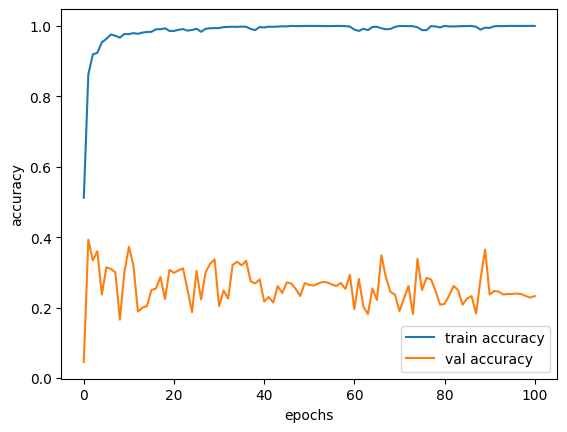

In [86]:
epochs = list(range(101))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

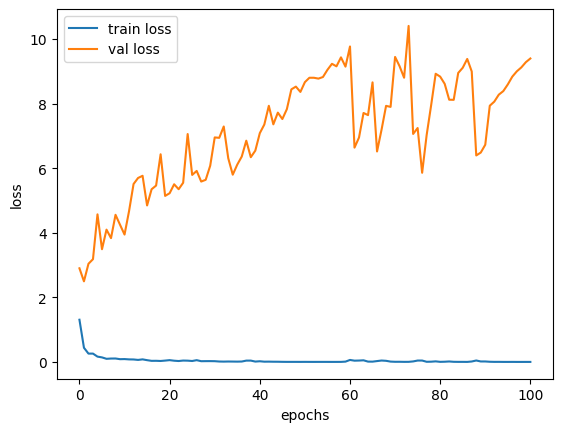

In [87]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()